In [1]:
library(readr)
df <- read_csv("D://JD crawler//snownlp_train3//reviews_test_predict2.csv")
drops <- c("X1","userName","Unnamed: 0","userId","days","score","referenceId","productUrl","predictFlag")
df <- df[ , !(names(df) %in% drops)]
head(df)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  `Unnamed: 0` = col_integer(),
  days = col_integer(),
  score = col_integer(),
  referenceId = col_double(),
  imageCount = col_integer(),
  usefulVoteCount = col_integer(),
  predictScore = col_double(),
  predictFlag = col_integer(),
  actualFlag = col_integer()
)
See spec(...) for full column specifications.


membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,predictScore,actualFlag
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<int>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019/5/8 8:45,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,False,0,Mobile Phone,0.9971100,1
4-Gold,老品牌值得信赖好用，物流相当快，好评，下次还买。,2019/6/13 17:50,Android,维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）,0,True,0,Mobile Phone,1.0000000,1
Plus,一直在用 还会继续回购 什么时候有赠品,2019/9/1 7:11,Android,云南白药 牙膏 180g （留兰香型）新老包装随机发货,0,False,0,Mobile Phone,0.9945464,1
Plus,快用完了 但效果不知道怎么样 因为是室外游泳,2019/6/19 13:17,iPhone,曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党,0,True,0,Mobile Phone,0.8612527,1
3-Silver,第一次用，气泡就把小零件吹起来了！,2019/9/24 20:20,Android,南极人（NANJIREN）全自动足浴盆电动高深桶加热洗脚盆 自助按摩脚泡脚机器足疗盆 （秒杀活动）十组合式自助数码屏,1,False,0,Mobile Phone,0.6981536,-1
Plus,质量非常好的椰子粉，大品牌，味道很不错。下回再来继续购买,2019/8/16 2:46,iPhone,海南特产 南国 营养早餐速溶饮料 咖啡伴侣 纯椰子粉320g/袋,0,False,1,Mobile Phone,0.9999970,1


In [2]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	114872 obs. of  11 variables:
 $ membershipLevel: chr  "Plus" "4-Gold" "Plus" "Plus" ...
 $ commentContent : chr  "这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧" "老品牌值得信赖好用，物流相当快，好评，下次还买。" "一直在用  还会继续回购  什么时候有赠品" "快用完了 但效果不知道怎么样 因为是室外游泳" ...
 $ commentTime    : chr  "2019/5/8 8:45" "2019/6/13 17:50" "2019/9/1 7:11" "2019/6/19 13:17" ...
 $ source         : chr  "Android" "Android" "Android" "iPhone" ...
 $ productName    : chr  "俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码" "维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）" "云南白药 牙膏 180g （留兰香型）新老包装随机发货" "曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党" ...
 $ imageCount     : int  3 0 0 0 1 0 0 0 0 0 ...
 $ containVideo   : chr  "False" "True" "False" "True" ...
 $ usefulVoteCount: int  0 0 0 0 0 1 0 0 0 0 ...
 $ device         : chr  "Mobile Phone" "Mobile Phone" "Mobile Phone" "Mobile Phone" ...
 $ predictScore   : num  0.997 1 0.995 0.861 0.698 ...
 $ actualFlag     : int  1 1 1 1 -1 1 1 1 1 1 

In [3]:
# check if there are any missing values
sapply(df, function(x) sum(is.na(x)))

membershipLevel  commentContent     commentTime          source     productName 
              0               0             577               0               0 
     imageCount    containVideo usefulVoteCount          device    predictScore 
              0               0               0               0               0 
     actualFlag 
              0

In [4]:
table(df$device)
table(df$source)
table(df$score)
table(df$membershipLevel)


Mobile Phone           PC 
      109295         5577 


        Android            iPad          iPhone              PC     QQ shopping 
          68150              24           38938            5577              67 
Wechat shopping 
           2116 

Warning message:
"Unknown or uninitialised column: 'score'."

< table of extent 0 >


   1-Normal    2-Bronze    3-Silver      4-Gold   5-Diamond  Enterprise 
       9494        8835       13136       12768       11139         429 
       Plus Plus(trial) 
      58391         680 

In [5]:
# format data
df$membershipLevel <- as.factor(df$membershipLevel)
df$device <- as.factor(df$device)
# df$score <- as.factor(df$score)
df$source <- as.factor(df$source)
# df$predictFlag <- as.factor(df$predictFlag)
# df$actualFlag <- as.factor(df$actualFlag)
df$commentTime <- as.POSIXct(df$commentTime,format="%Y/%m/%d %H:%M")
df[,"commentHour"] <- as.POSIXlt(df$commentTime)$hour
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	114872 obs. of  12 variables:
 $ membershipLevel: Factor w/ 8 levels "1-Normal","2-Bronze",..: 7 4 7 7 3 7 7 5 2 7 ...
 $ commentContent : chr  "这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧" "老品牌值得信赖好用，物流相当快，好评，下次还买。" "一直在用  还会继续回购  什么时候有赠品" "快用完了 但效果不知道怎么样 因为是室外游泳" ...
 $ commentTime    : POSIXct, format: "2019-05-08 08:45:00" "2019-06-13 17:50:00" ...
 $ source         : Factor w/ 6 levels "Android","iPad",..: 1 1 1 3 1 3 3 1 6 3 ...
 $ productName    : chr  "俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码" "维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）" "云南白药 牙膏 180g （留兰香型）新老包装随机发货" "曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党" ...
 $ imageCount     : int  3 0 0 0 1 0 0 0 0 0 ...
 $ containVideo   : chr  "False" "True" "False" "True" ...
 $ usefulVoteCount: int  0 0 0 0 0 1 0 0 0 0 ...
 $ device         : Factor w/ 2 levels "Mobile Phone",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ predictScore   : num  0.997 1 0.995 0.861 0.698 ...
 $ actualFlag     :

In [6]:
library(dplyr)
# filter(df, device == 'PC') %>% summarize(PC_mean = mean(predictScore))
mutate(df) %>%
 group_by(device) %>%
 summarize(mean_sentiScore = mean(predictScore, na.rm = TRUE), count = n())
mutate(df) %>%
 group_by(source) %>%
 summarize(mean_sentiScore = mean(predictScore, na.rm = TRUE), count = n())

target <- c('1-Normal','2-Bronze','3-Silver','4-Gold','5-Diamond')
memberdf <- filter(df, membershipLevel %in% target)
mutate(memberdf) %>%
 group_by(membershipLevel) %>%
 summarize(mean_sentiScore = mean(predictScore, na.rm = TRUE), count = n())

mutate(df) %>%
 summarise(extremely_positive_percentage_total = sum(predictScore == 1)/n(), extremely_negative_percentage_total = sum(predictScore == 0)/n())

mutate(df) %>%
 summarise(positive_percentage_total = sum(predictScore >= 0.6)/n(), negative_percentage_total = sum(predictScore < 0.6)/n())

mutate(df) %>%
 group_by(device) %>%
 summarise(extremely_positive_percentage = sum(predictScore == 1)/n(), extremely_negative_percentage = sum(predictScore == 0)/n())

mutate(df) %>%
 group_by(device) %>%
 summarise(positive_percentage = sum(predictScore >= 0.6)/n(), negative_percentage = sum(predictScore < 0.6)/n())


Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



device,mean_sentiScore,count
<fct>,<dbl>,<int>
Mobile Phone,0.8893339,109295
PC,0.8651195,5577


source,mean_sentiScore,count
<fct>,<dbl>,<int>
Android,0.8927586,68150
iPad,0.7914724,24
iPhone,0.8895737,38938
PC,0.8651195,5577
QQ shopping,0.7811316,67
Wechat shopping,0.7791588,2116


membershipLevel,mean_sentiScore,count
<fct>,<dbl>,<int>
1-Normal,0.9084082,9494
2-Bronze,0.8543994,8835
3-Silver,0.8548754,13136
4-Gold,0.8630464,12768
5-Diamond,0.8760885,11139


extremely_positive_percentage_total,extremely_negative_percentage_total
<dbl>,<dbl>
0.01652274,0.0007051327


positive_percentage_total,negative_percentage_total
<dbl>,<dbl>
0.8900167,0.1099833


device,extremely_positive_percentage,extremely_negative_percentage
<fct>,<dbl>,<dbl>
Mobile Phone,0.01506016,0.0006679171
PC,0.04518558,0.0014344630


device,positive_percentage,negative_percentage
<fct>,<dbl>,<dbl>
Mobile Phone,0.8911753,0.1088247
PC,0.8673122,0.1326878


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9566  0.9990  0.8882  1.0000  1.0000 

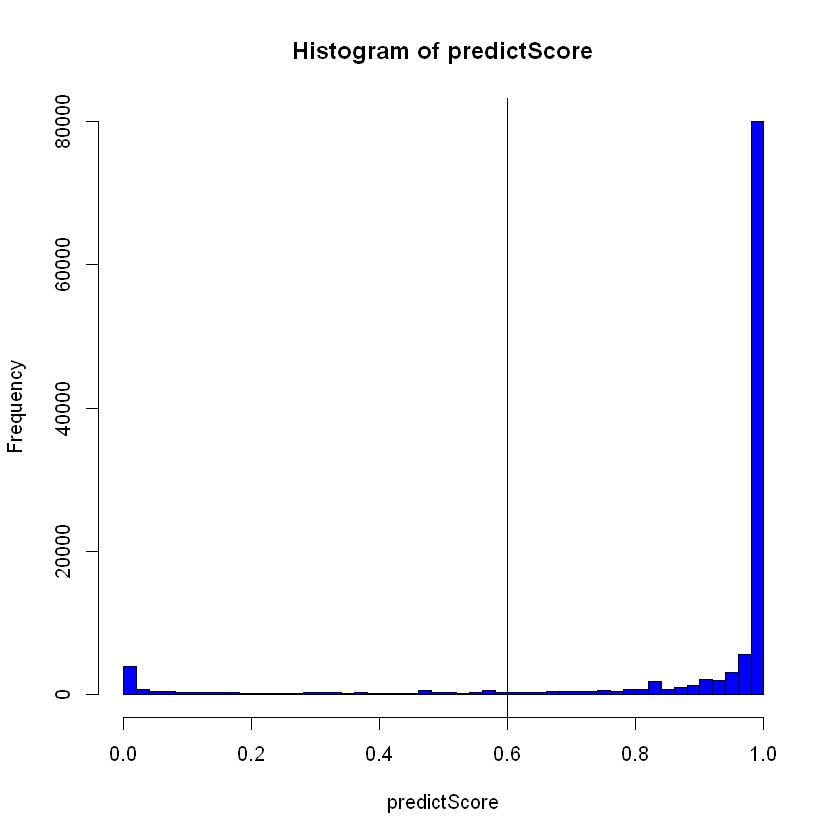

In [7]:
attach(df) 
summary(predictScore)
# hist(predictScore, xlab = "Credit Month", ylab = "Frequency", main = " ", cex=0.4)
hist(predictScore, col = "blue", breaks = 50)
abline(v=0.6)
# boxplot(predictScore, bty="n",xlab = "sentiment score", cex=0.4)
# hist(days, col = "green", breaks = 50)


In [8]:
# boxplot(days, horizontal = TRUE, axes = FALSE, staplewex = 1)
# text(x = boxplot.stats(days)$stats, labels = boxplot.stats(days)$stats, y = 1.25)
# summary(days)

In [9]:
# df$cmTimeBins <- cut(df$days, breaks=c(-10,0,3,7,14,30,141), labels=c("minus 0 ","3 days","one week","two weeks","one month","one month later"))

In [10]:
# mutate(df) %>%
#  group_by(cmTimeBins) %>%
#  summarize(sentiScore = mean(predictScore, na.rm = TRUE), count = n())

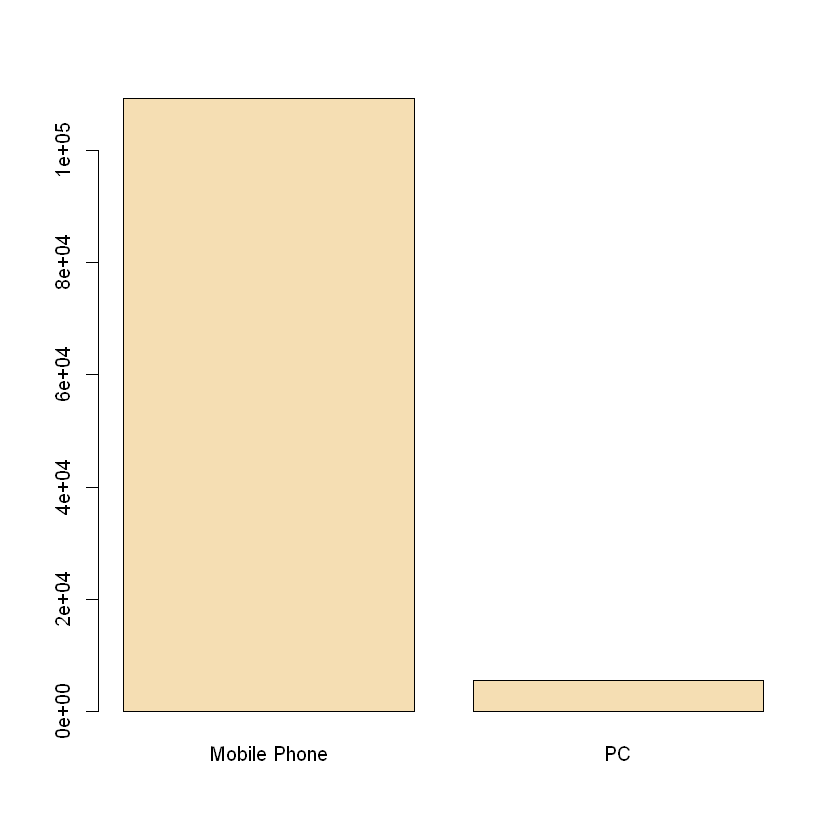

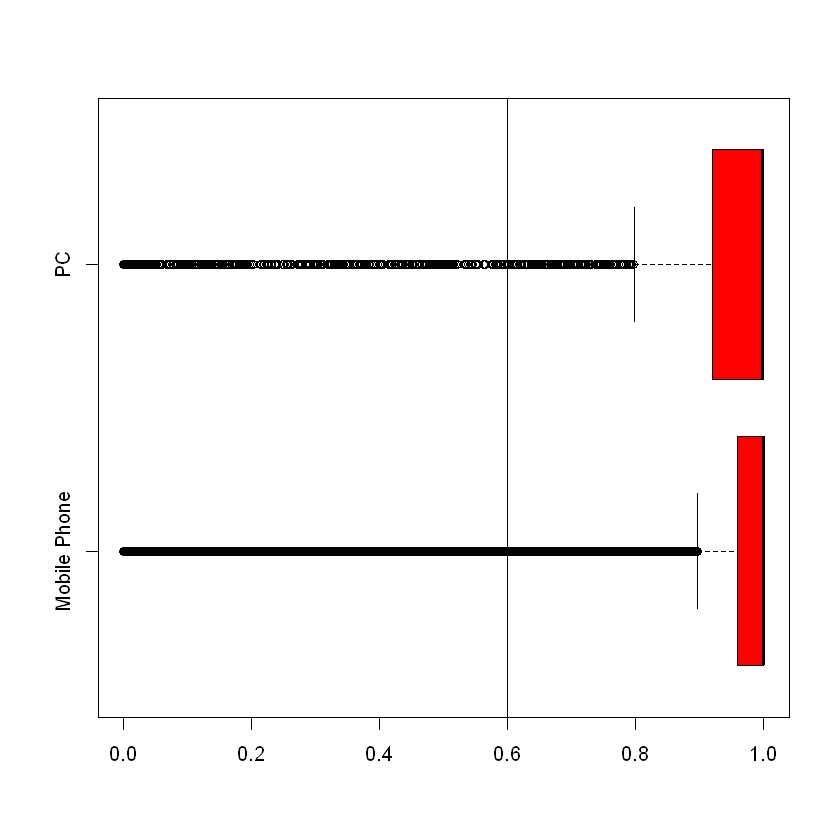

In [11]:
table(device) %>% barplot(col = "wheat")
boxplot(predictScore ~device, data = df, col = "red", horizontal = TRUE)
abline(v=0.6)

In [12]:
# PCdf <- filter(df, device == 'PC')
# MBdf <- filter(df, device == 'Mobile Phone')
df$commentHour <- as.factor(df$commentHour)
df2 <- na.omit(df)
df2 <- mutate(df2) %>%
 group_by(commentHour) %>%
 summarise(MB_PC = sum(device == "Mobile Phone")/sum(device == "PC"), PC_MB= sum(device == "PC")/sum(device == "Mobile Phone"))
head(df2)

commentHour,MB_PC,PC_MB
<fct>,<dbl>,<dbl>
0,30.42029,0.03287280
1,25.78788,0.03877791
2,23.43750,0.04266667
3,27.00000,0.03703704
4,125.00000,0.00800000
5,44.80000,0.02232143


Warning message:
"package 'ggplot2' was built under R version 3.5.3"

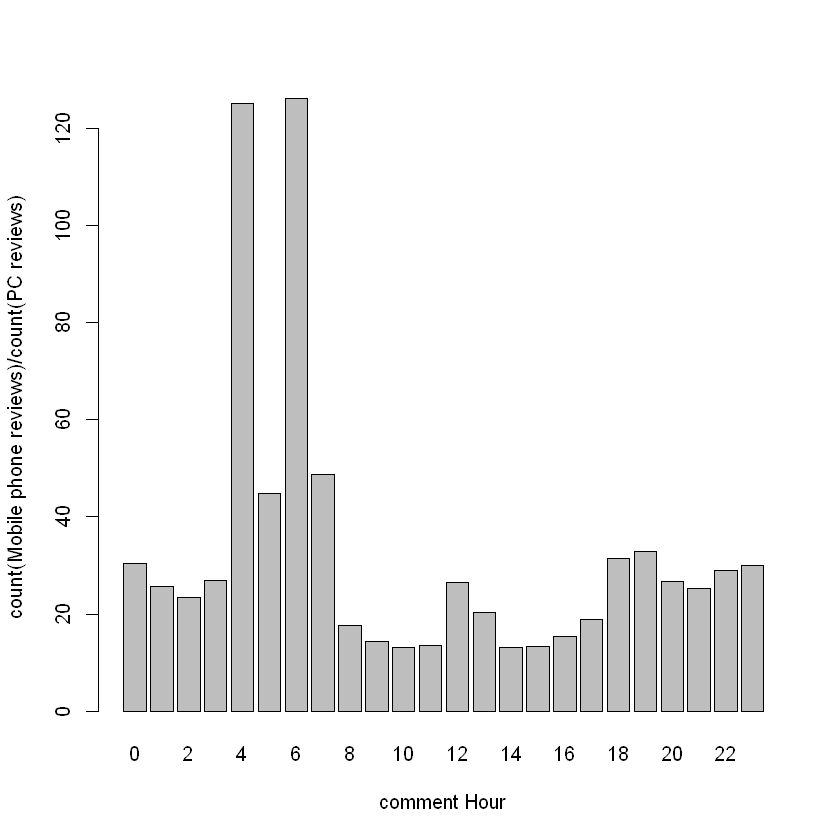

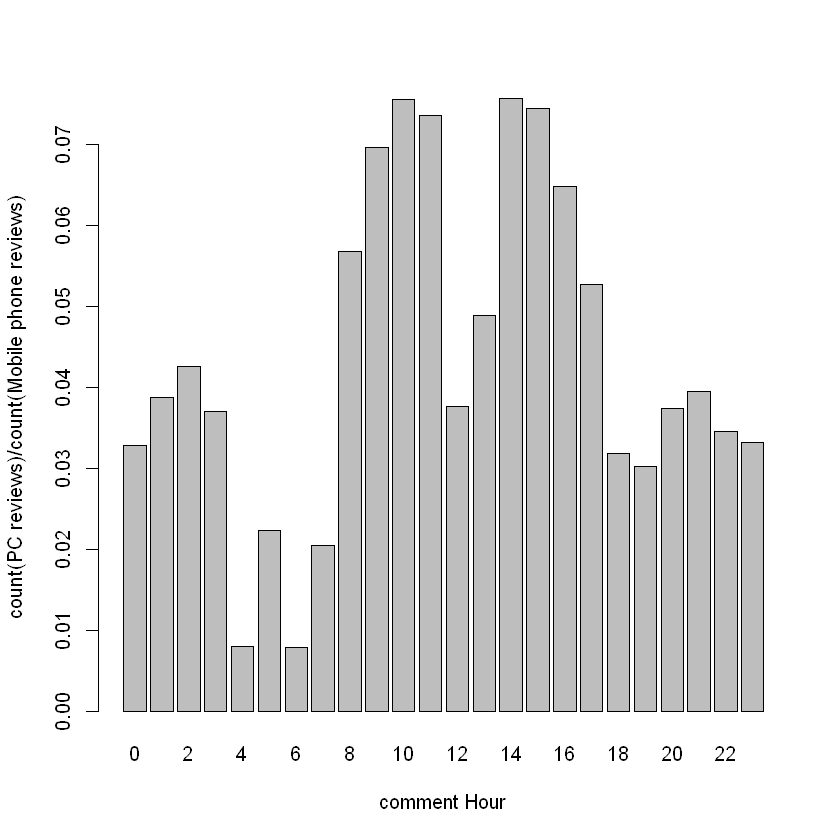

In [13]:
library(ggplot2)
barplot(df2$MB_PC, xlab='comment Hour', ylab = "count(Mobile phone reviews)/count(PC reviews)", names.arg = df2$commentHour)
barplot(df2$PC_MB, xlab='comment Hour', ylab = "count(PC reviews)/count(Mobile phone reviews)", names.arg = df2$commentHour)
# table(df2$cyl, mtcars$gear, dnn=c("Cylinders", "Gears"))
# barplot(df2, ylab="Frequency", xlab="Gears", main="Side-By-Side Bar Chart", col=c("PC_prec", "MB_prec" ), beside=TRUE, width=.3)

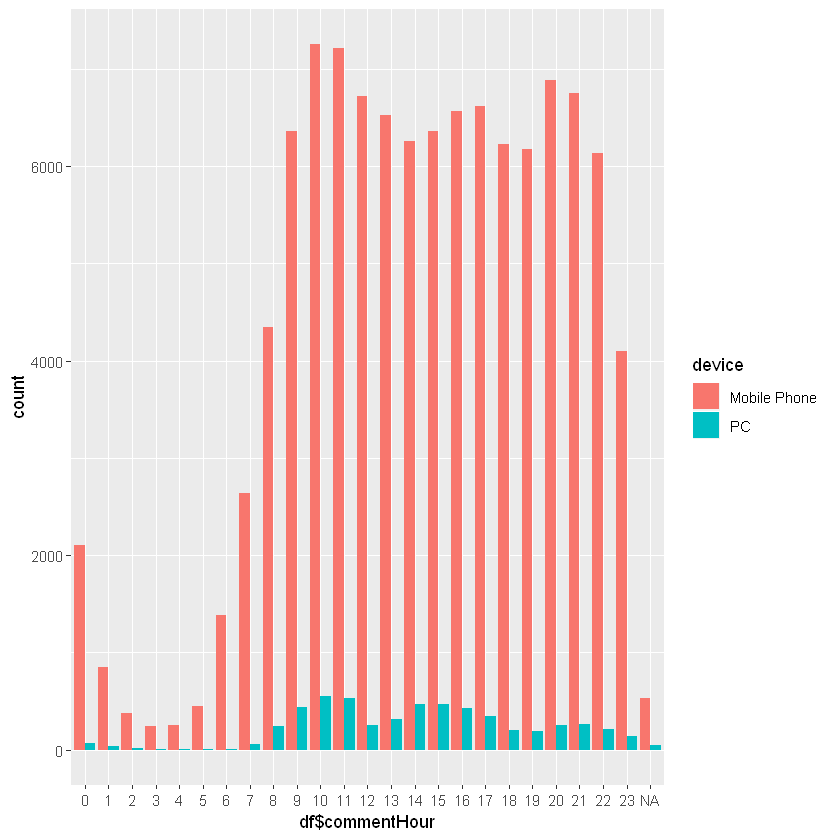

In [14]:
ggplot(df, aes(df$commentHour, ..count..)) + geom_bar(aes(fill = device), position = "dodge") 

In [15]:
library(stringi)
library(stringr)
wordCount <- function(x) {  
    word <- gsub("\r?\n|\r", " ", x)
    word <- stri_stats_latex(word)[1]
    wordCount <- as.numeric(str_extract_all(word, "[0-9]+"))
    return(wordCount)
}
df$commentLen <- sapply(df$commentContent, wordCount)

Warning message:
"package 'stringr' was built under R version 3.5.3"

In [16]:
tail(df)
df$commentHour <- as.integer(df$commentHour)

membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,predictScore,actualFlag,commentHour,commentLen
<fct>,<chr>,<dttm>,<fct>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<int>,<fct>,<dbl>
Plus,活着 可口可乐具体土豪贴脸,2019-08-11 11:14:00,iPhone,余华作品：活着,1,False,0,Mobile Phone,0.9326953,1,11,12
3-Silver,容量很大，携带方便，小巧玲珑，很好用。,2019-09-20 08:57:00,Android,壹号公路 20000毫安 镜面大容量充电宝 数显移动电源 双USB输出 适用于苹果/安卓/小米/华为通用,0,False,0,Mobile Phone,0.9999991,1,8,15
4-Gold,垫子还可以，大小颜色都喜欢，唯一不足的放下去与车地板会移动，垫子背面没有防滑倒刺。,2019-08-30 10:59:00,iPhone,车丽友 全包围丝圈汽车脚垫 大众新途观L科鲁泽荣威i5I6宝来雷凌缤智XRV英朗福睿斯科沃兹缤越哈弗M6F7H4定制,0,False,0,Mobile Phone,0.9878570,1,10,37
4-Gold,这个延时的已经买好多次了，比普通的确实能延时好久，对象很喜欢呢。你们说该怎么办？,2019-04-24 07:05:00,Android,杜蕾斯 避孕套 安全套 持久12只 延时持久型 套套 男用 成人用品 原装进口 Durex,0,False,0,Mobile Phone,0.9993948,1,7,36
2-Bronze,一般吧，就那样，一分钱一分货,2019-06-16 13:47:00,iPhone,梵地亚（Vantiiear）万向轮拉杆箱耐磨抗摔24英寸旅行箱男女行李箱 蓝色,0,False,0,Mobile Phone,0.6783716,1,13,12
Plus,准确度很好，速度快&hellip;,2019-07-31 14:19:00,Android,米特尔（MITIR）探针式厨房食品温度计油温计婴儿奶温计水温计电子温度计 TP600 （白色）,1,False,0,Mobile Phone,0.9999242,1,14,14


In [17]:
table(df$productName)


                                               【3片装】朗客 iPhone8plus/7Plus/6sPlus/6 Plus钢化膜 苹果8P/7P/6sP/6P手机膜高清手机贴膜【赠贴膜神器】 
                                                                                                                                                576 
                                                                   【捌零零壹】邮票年册 1999--2018年册北方集邮册大全套 收藏品 2018年邮票年册-北方册 
                                                                                                                                                281 
                                  【磁吸版】线控耳机 缔造者入耳式有耳麦运动游戏电脑魔音乐手机耳机 苹果小米华为荣耀魅族OPPO三星 【线控带麦】- 尊贵黑 
                                                                                                                                                286 
                                                                                                        【高邮馆】南湖牌 咸鸭蛋盐蛋20枚 65g/枚 简装 
                                                                                   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


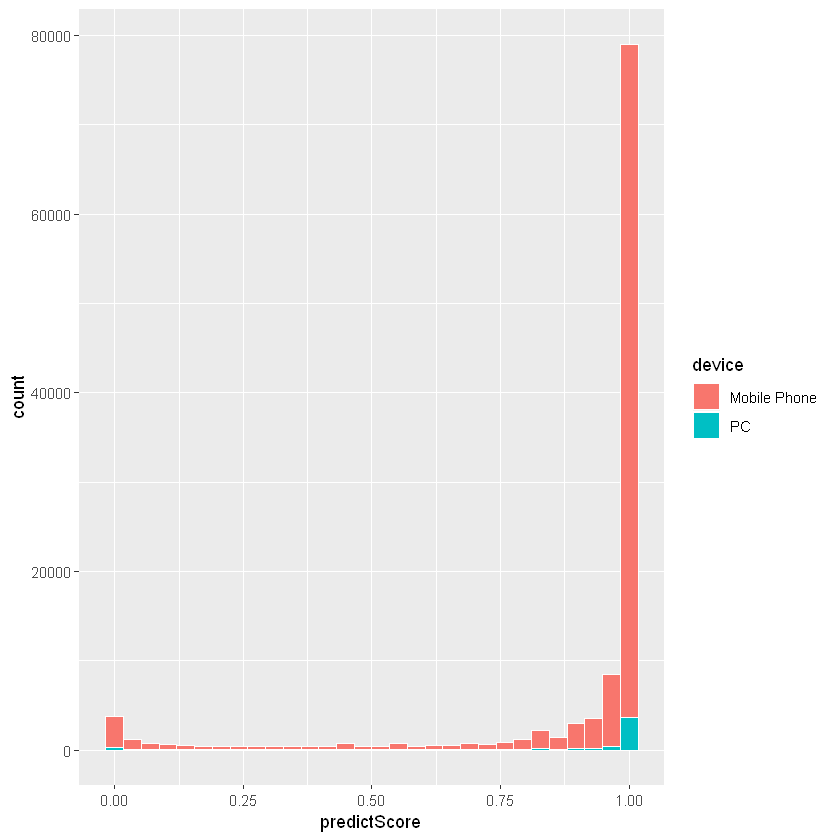

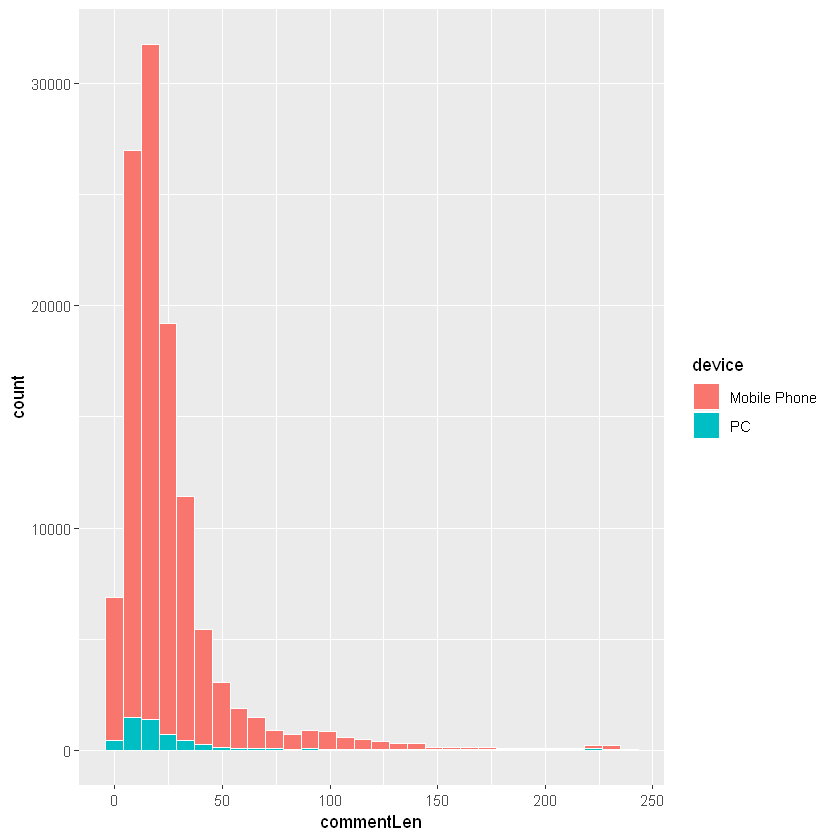

In [18]:
ggplot()+geom_histogram(data=df,aes(predictScore,..count..,fill=device),color='white')
ggplot()+geom_histogram(data=df,aes(commentLen,..count..,fill=device),color='white')

device,commentLength,count
<fct>,<dbl>,<int>
Mobile Phone,25.77082,109295
PC,32.49955,5577


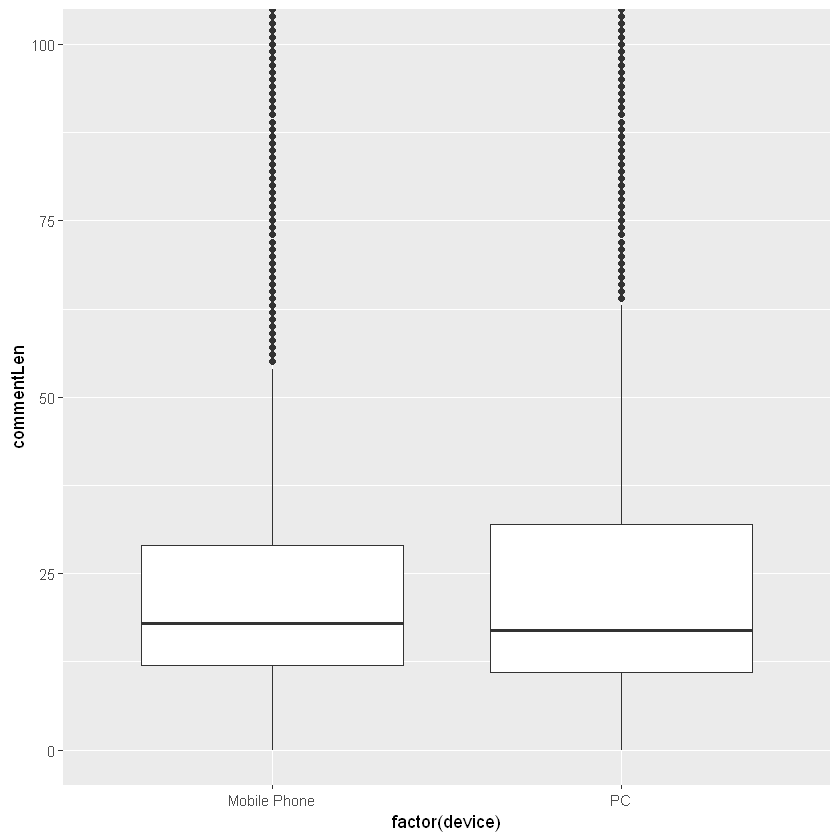

In [19]:
mutate(df) %>%
 group_by(device) %>%
 summarize(commentLength = mean(commentLen, na.rm = TRUE), count = n())
ggplot(df, aes(factor(device), commentLen)) + geom_boxplot() + coord_cartesian(ylim = c(0, 100))

In [20]:
mutate(df) %>%
 group_by(device) %>%
 summarize(usefulVoteCount = mean(usefulVoteCount, na.rm = TRUE), count = n())

device,usefulVoteCount,count
<fct>,<dbl>,<int>
Mobile Phone,0.1316163,109295
PC,0.2992648,5577


Warning message:
"package 'DataExplorer' was built under R version 3.5.3"

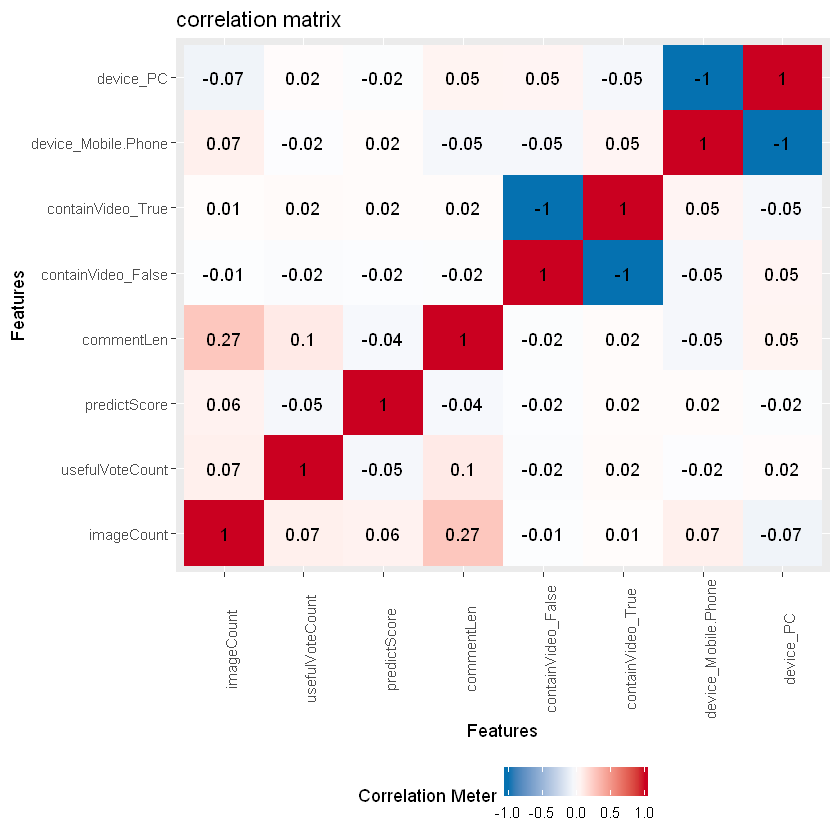

In [21]:
library("DataExplorer")
plot_correlation(df[c(6,7,8,9,10,13)], maxcat = 20L, title= 'correlation matrix')

membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,predictScore,actualFlag,commentHour,commentLen
<fct>,<chr>,<dttm>,<fct>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019-05-08 08:45:00,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,False,0,Mobile Phone,0.9971100,1,9,24
4-Gold,老品牌值得信赖好用，物流相当快，好评，下次还买。,2019-06-13 17:50:00,Android,维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）,0,True,0,Mobile Phone,1.0000000,1,18,20
Plus,一直在用 还会继续回购 什么时候有赠品,2019-09-01 07:11:00,Android,云南白药 牙膏 180g （留兰香型）新老包装随机发货,0,False,0,Mobile Phone,0.9945464,1,8,17
Plus,快用完了 但效果不知道怎么样 因为是室外游泳,2019-06-19 13:17:00,iPhone,曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党,0,True,0,Mobile Phone,0.8612527,1,14,20
3-Silver,第一次用，气泡就把小零件吹起来了！,2019-09-24 20:20:00,Android,南极人（NANJIREN）全自动足浴盆电动高深桶加热洗脚盆 自助按摩脚泡脚机器足疗盆 （秒杀活动）十组合式自助数码屏,1,False,0,Mobile Phone,0.6981536,-1,21,15
Plus,质量非常好的椰子粉，大品牌，味道很不错。下回再来继续购买,2019-08-16 02:46:00,iPhone,海南特产 南国 营养早餐速溶饮料 咖啡伴侣 纯椰子粉320g/袋,0,False,1,Mobile Phone,0.9999970,1,3,25


rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
114872,13,7,6,0,1158,114293,1493336,25659864


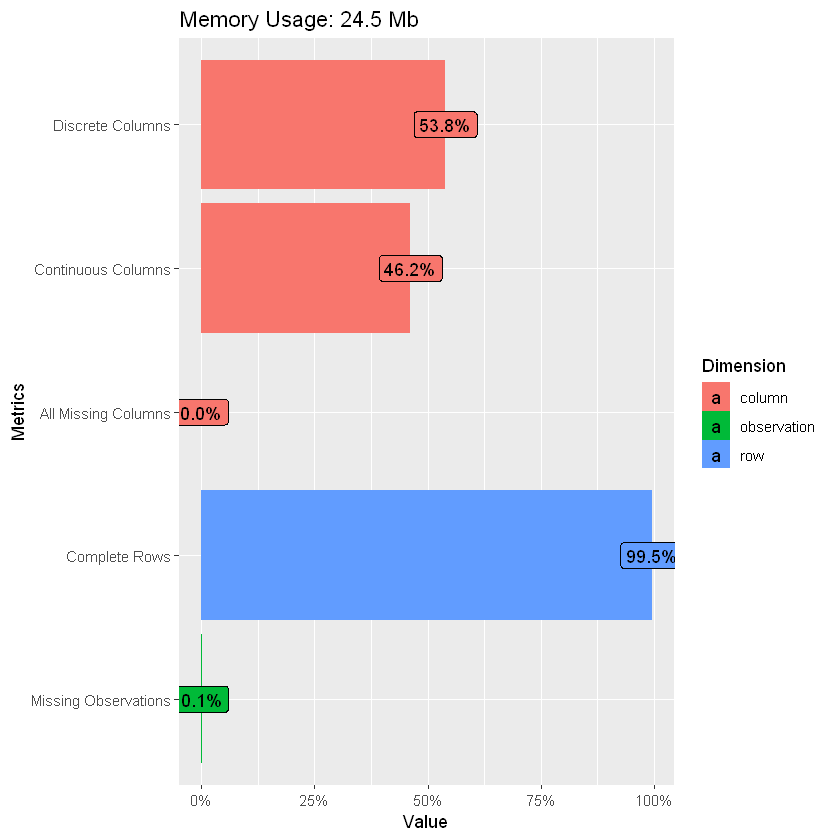

3 columns ignored with more than 50 categories.
commentContent: 107944 categories
commentTime: 85533 categories
productName: 248 categories



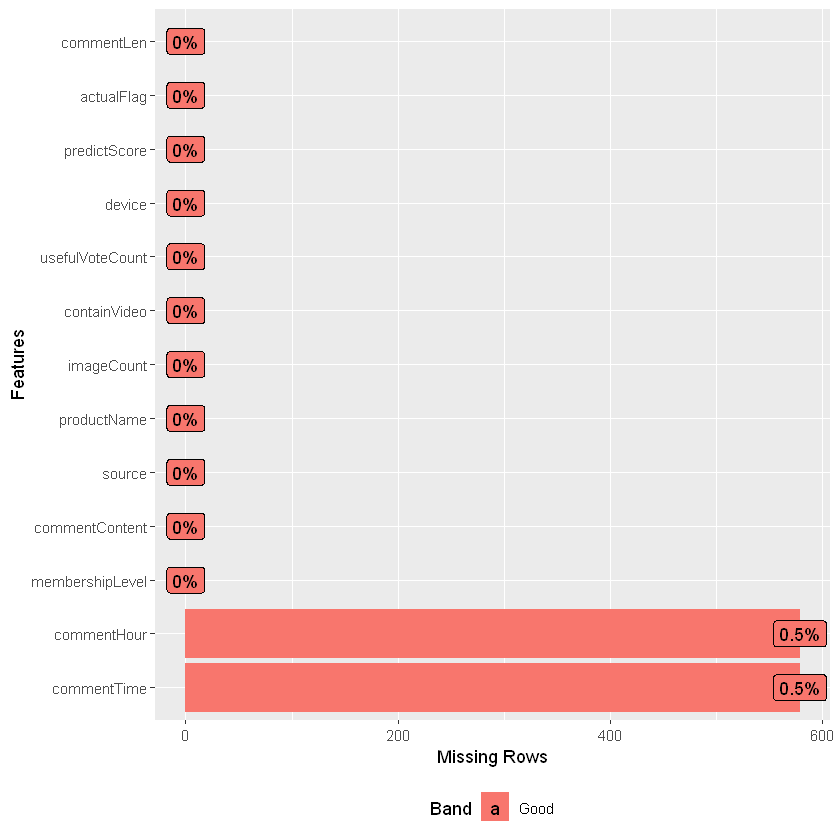

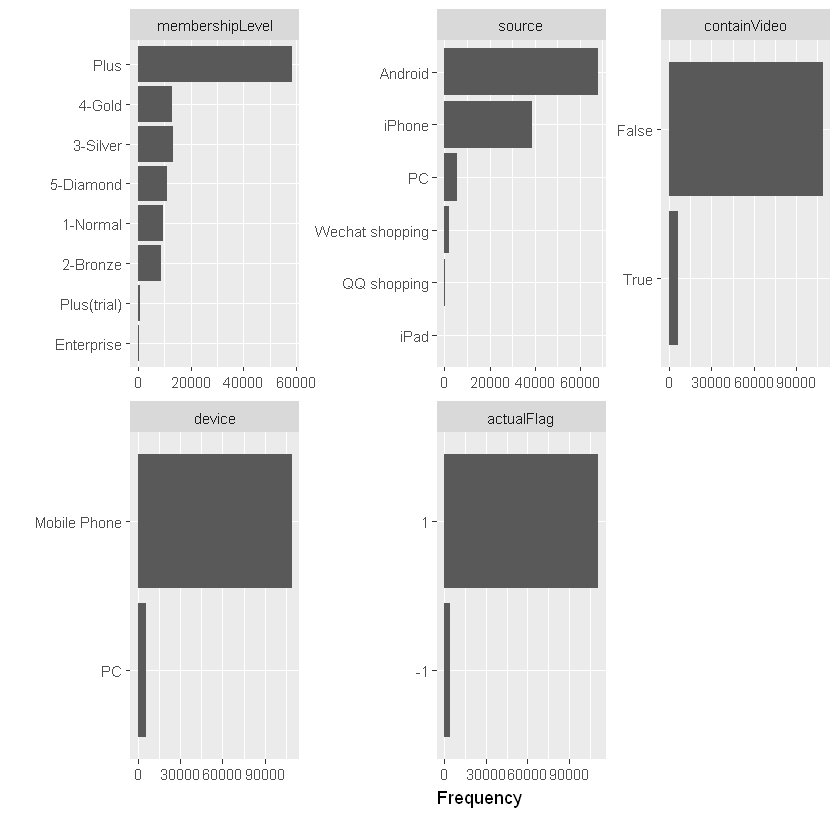

In [22]:
#exploratory data analysis using DataExplorer
head(df)
introduce(df)
plot_intro(df)
plot_missing(df)
plot_bar(df, binary_as_factor = TRUE)

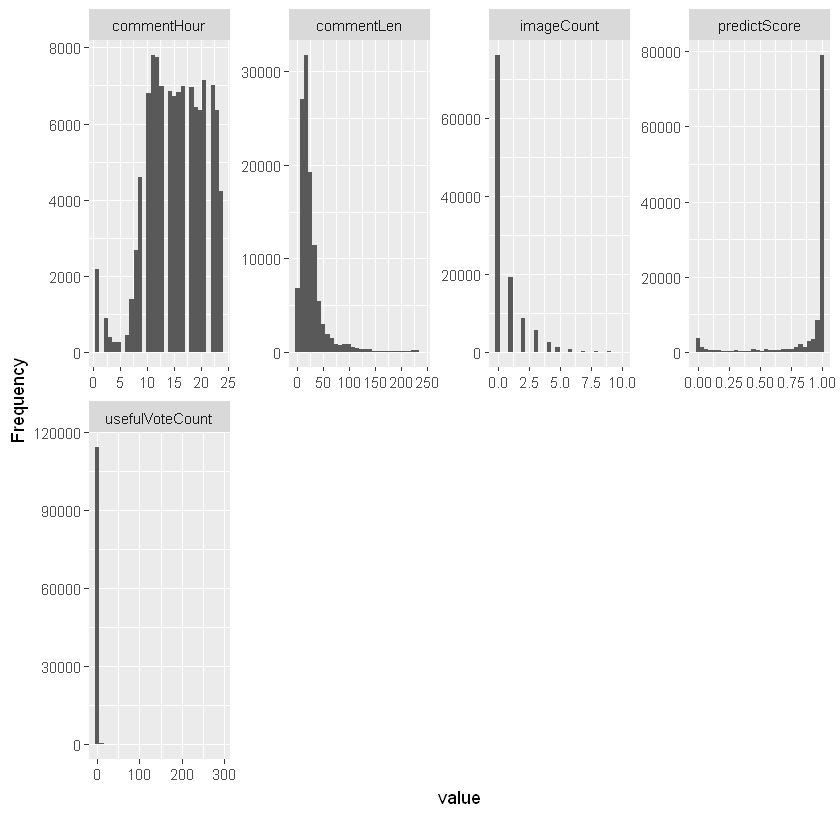

In [23]:
plot_histogram(df)

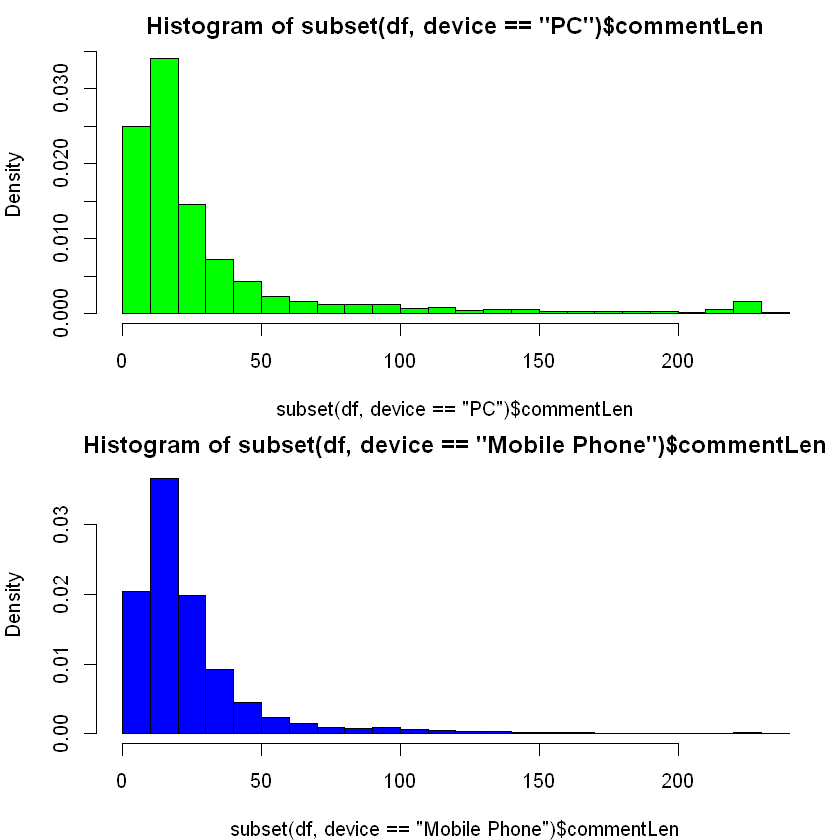

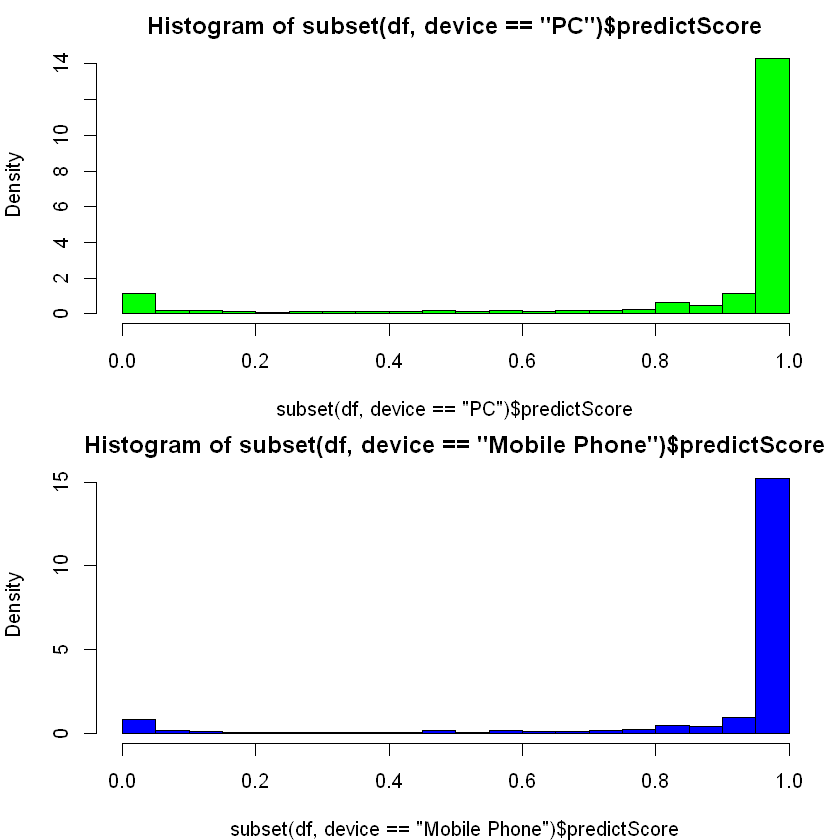

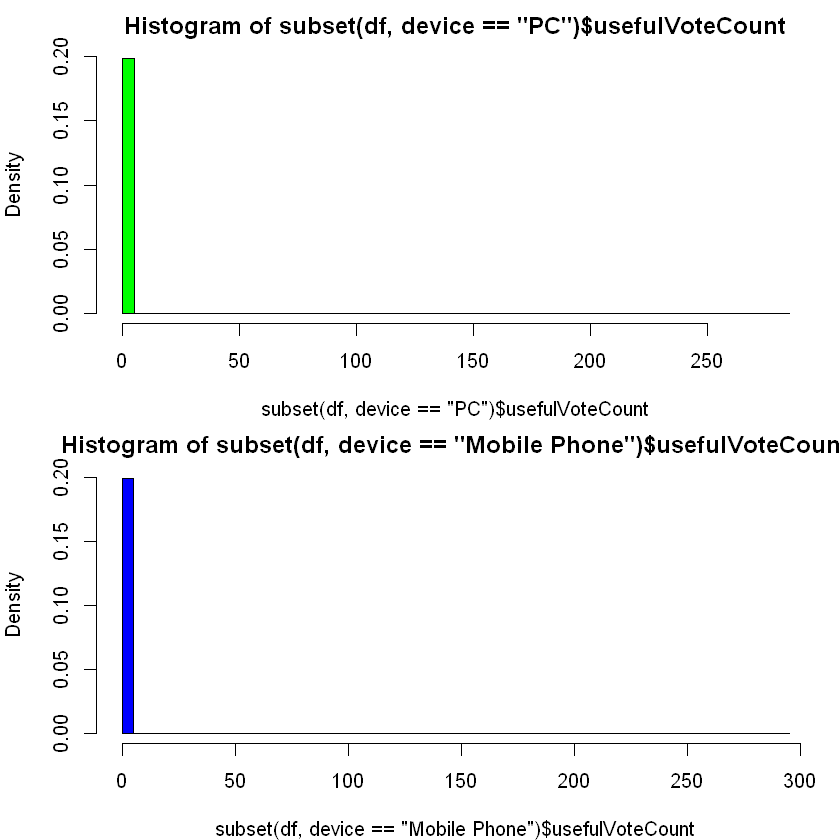

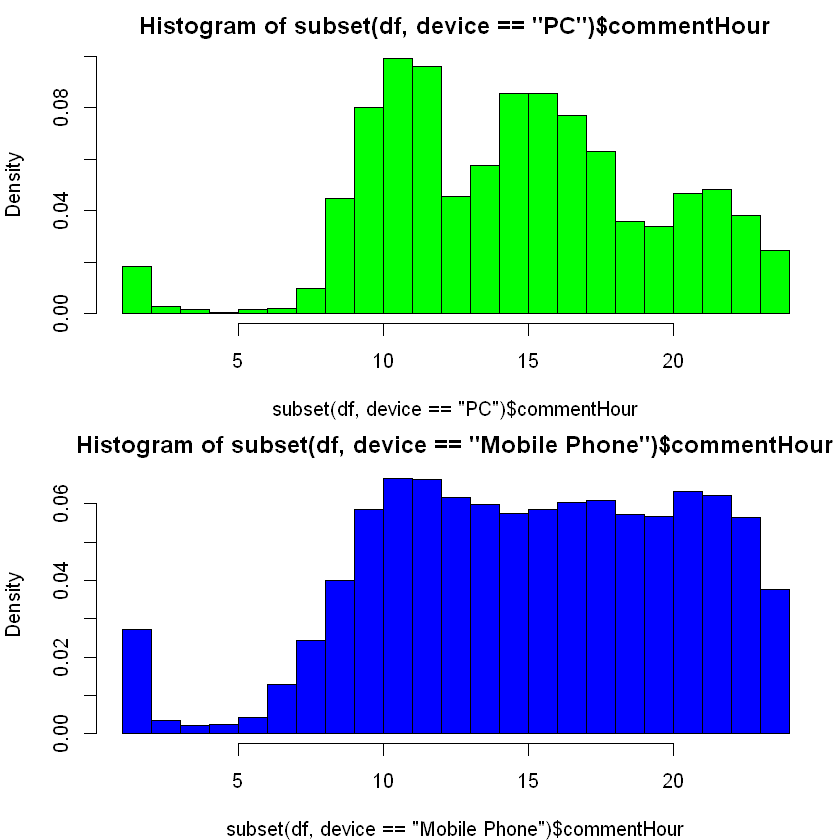

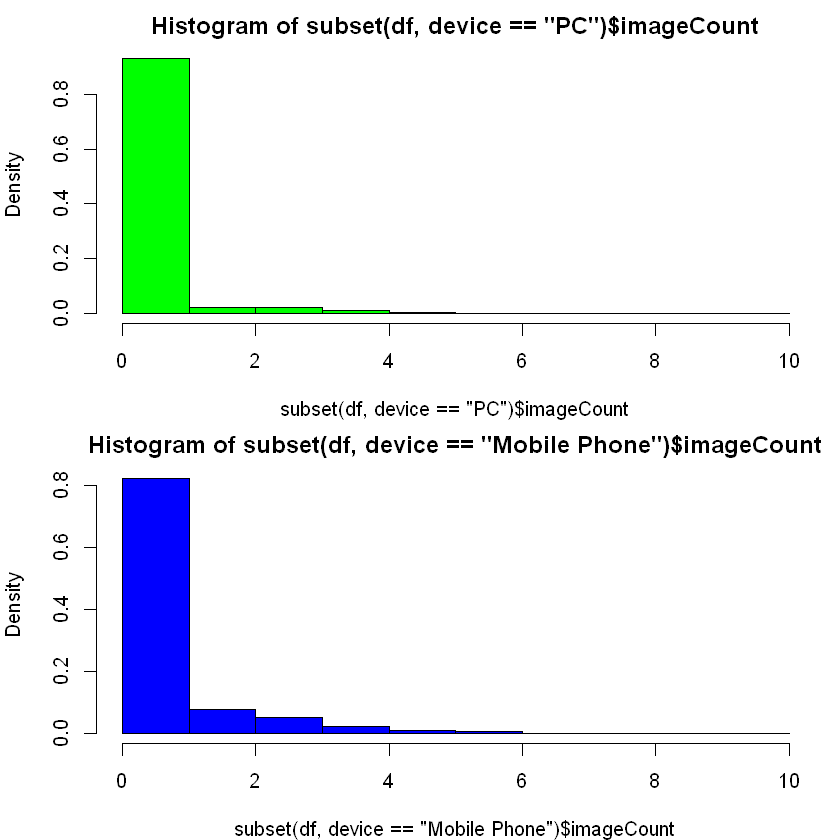

In [24]:
par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$commentLen, col = "green", breaks = 30, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$commentLen, col = "blue", breaks = 30, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$predictScore, col = "green", breaks = 30, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$predictScore, col = "blue", breaks = 30, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$usefulVoteCount, col = "green", breaks = 100, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$usefulVoteCount, col = "blue", breaks = 100, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$commentHour, col = "green", breaks = 24, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$commentHour, col = "blue", breaks = 24, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$imageCount, col = "green", breaks = 10, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$imageCount, col = "blue", breaks = 10, freq=FALSE)

In [25]:
#propensity score matching
df_cov <- c('imageCount', 'usefulVoteCount', 'commentLen', 'predictScore','device')
df %>%
  group_by(device) %>%
  select(one_of(df_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

#t-test
with(df, t.test(imageCount ~ device))
with(df, t.test(usefulVoteCount ~ device))
with(df, t.test(commentLen ~ device))
with(df, t.test(predictScore ~ device))

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."

device,imageCount,usefulVoteCount,commentLen,predictScore
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Mobile Phone,0.7115605,0.1316163,25.77082,0.8893339
PC,0.2820513,0.2992648,32.49955,0.8651195



	Welch Two Sample t-test

data:  imageCount by device
t = 31.604, df = 6611.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4028681 0.4561503
sample estimates:
mean in group Mobile Phone           mean in group PC 
                 0.7115605                  0.2820513 



	Welch Two Sample t-test

data:  usefulVoteCount by device
t = -2.2801, df = 5638, p-value = 0.02264
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.31178668 -0.02351046
sample estimates:
mean in group Mobile Phone           mean in group PC 
                 0.1316163                  0.2992648 



	Welch Two Sample t-test

data:  commentLen by device
t = -11.25, df = 5796, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.901256 -5.556203
sample estimates:
mean in group Mobile Phone           mean in group PC 
                  25.77082                   32.49955 



	Welch Two Sample t-test

data:  predictScore by device
t = 6.2553, df = 6052.3, p-value = 4.238e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01662585 0.03180297
sample estimates:
mean in group Mobile Phone           mean in group PC 
                 0.8893339                  0.8651195 


In [26]:
df$treat <- recode(df$device, "PC"="1", "Mobile Phone" = "0")
str(df$treat)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [27]:
install.packages("MatchIt")

package 'MatchIt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hanwen\AppData\Local\Temp\RtmpS6W7T8\downloaded_packages


In [28]:
library(MatchIt)
df3 <- na.omit(df)
# pcm.out = matchit(treat ~ usefulVoteCount + imageCount + membershipLevel + commentLen, data = df3, method = "nearest",ratio = 1)
# summary(pcm.out)
# plot(pcm.out, type = "jitter")
# plot(pcm.out, type = "hist")

Warning message:
"package 'MatchIt' was built under R version 3.5.3"

In [29]:
# pcm.data <- match.data(pcm.out)
# write.csv(pcm.data, file ="D:/JD crawler/propensity score matching/pcm_output.csv", fileEncoding = 'utf-8-sig')

In [31]:
install.packages("Matching")
library(Matching)
install.packages("rbounds")
library("rbounds")

package 'Matching' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hanwen\AppData\Local\Temp\RtmpS6W7T8\downloaded_packages


Warning message:
"package 'Matching' was built under R version 3.5.3"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



package 'rbounds' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hanwen\AppData\Local\Temp\RtmpS6W7T8\downloaded_packages


Warning message:
"package 'rbounds' was built under R version 3.5.3"

In [ ]:
attach(df)
# Defining variables (Tr is treatment, Y is outcome, X are independent variables)
Tr <- cbind(treat)
Y <- cbind(predictScore)
X <- cbind(usefulVoteCount,imageCount,membershipLevel,commentLen)
# Outcome for difference-in-differences model
# Y <- cbind(REDIFF)
# Descriptive statistics
summary (Tr)
summary(Y)
summary(X)
# Propensity score model
glm1 <- glm(Tr ~ X, family=binomial(link = "probit"), data=df3)
summary(glm1)
# Average treatment on the treated effect
rr1 <- Match(Y = Y, Tr = Tr, X = glm1$fitted)
summary(rr1)
rr2 <- Match(Y = Y, Tr = Tr, X = glm1$fitted, estimand = "ATT", M = 1, ties = TRUE,
replace = TRUE)
# rr3 <- Match(Y = Y, Tr = Tr, X = glm1$fitted, estimand = "ATE", M = 1, ties = TRUE,
replace = TRUE)